# Analysis of web scraping results

Next steps of analysis:

- a: Include comments for each step / Possibly include images of products
- b: Improve chart for total sume of products per day and per supermarket
    - Consider use of matplotlib, seaborn or other libraries (try use of Power BI?)
- c: Analyze which supermarket has the product with the smallest value for each day

This notebook covers the following steps:

1. Read file that didn't have the datetime column and include it by extracting the data from the filename
2. Read rest of the files and concatenate data from both dataframes

In [1]:
# import libraries
import pandas as pd
import glob
import os
from datetime import datetime

In [2]:
# save path of the current directory to a variable and create a list with path and filenames
path = os.getcwd()
csv_files = glob.glob(path + "/webscraping_results/*.csv")

csv_files

['C:\\Users\\Clarissa\\Documents\\Datasets\\webscraping_project_01/webscraping_results\\webscraping_results_20230225-2038.csv',
 'C:\\Users\\Clarissa\\Documents\\Datasets\\webscraping_project_01/webscraping_results\\webscraping_results_20230304-1702.csv',
 'C:\\Users\\Clarissa\\Documents\\Datasets\\webscraping_project_01/webscraping_results\\webscraping_results_20230319-1844.csv',
 'C:\\Users\\Clarissa\\Documents\\Datasets\\webscraping_project_01/webscraping_results\\webscraping_results_20230326-1621.csv',
 'C:\\Users\\Clarissa\\Documents\\Datasets\\webscraping_project_01/webscraping_results\\webscraping_results_20230331-1710.csv']

In [3]:
# extract datetime from filename for first saved file
first_filename = os.path.basename(csv_files[0])
file_datetime = first_filename.split("_")[2].replace(".csv", "")
file_datetime = datetime.strptime(file_datetime, "%Y%m%d-%H%M")

# create dataframe with first file and include datetime as a column
df_first_result = pd.read_csv(csv_files[0]).drop(['Unnamed: 0'],axis=1)
df_first_result['datetime'] = file_datetime

# reorder columns
reordered_columns = ['datetime', 'supermarket', 'product', 'product_name', 'product_price']
df_first_result = df_first_result[reordered_columns]

df_first_result.head()

,datetime,supermarket,product,product_name,product_price
0,2023-02-25 20:38:00,sfw,Milk,Dairyland 2% Milk 1 L,2.99
1,2023-02-25 20:38:00,sfw,Tomato sauce,Hunt's Fat-Free Tomato Sauce 680 ml,2.99
2,2023-02-25 20:38:00,sfw,Spaguetti,Catelli Pasta Spaghetti 900 g,5.49
3,2023-02-25 20:38:00,sfw,Bacon,Schneiders Hickory Smoked Classic Cut Bacon 375 g,4.99
4,2023-02-25 20:38:00,sfw,Beans,Unico Black Beans 540 ml,2.49


In [4]:
# create list of dataframes with files that had datetime column
df_list = (pd.read_csv(file) for file in csv_files[1:])

# concatenate all dataframes and drop index column from csv
webscraping_results = pd.concat(df_list, ignore_index=True).drop('Unnamed: 0', axis=1)

# concatenate dataframe with first results file
webscraping_results = pd.concat([df_first_result, webscraping_results])

webscraping_results

,datetime,supermarket,product,product_name,product_price
0,2023-02-25 20:38:00,sfw,Milk,Dairyland 2% Milk 1 L,2.99
1,2023-02-25 20:38:00,sfw,Tomato sauce,Hunt's Fat-Free Tomato Sauce 680 ml,2.99
2,2023-02-25 20:38:00,sfw,Spaguetti,Catelli Pasta Spaghetti 900 g,5.49
3,2023-02-25 20:38:00,sfw,Bacon,Schneiders Hickory Smoked Classic Cut Bacon 375 g,4.99
4,2023-02-25 20:38:00,sfw,Beans,Unico Black Beans 540 ml,2.49
...,...,...,...,...,...
75,2023-03-31 17:10:45.291617,sof,Strawberries,"Strawberries - Fresh, 1 Pound",5.49
76,2023-03-31 17:10:46.474374,sof,Bread,"Dempster's - White Bread - Sliced, 570 Gram",4.99
77,2023-03-31 17:10:47.252491,sof,Sliced ham,Maple Leaf - Natural Selections Sliced Deli Ha...,8.49
78,2023-03-31 17:10:47.952991,sof,Sliced cheese,"Cracker Barrel - Mozzarella Cheese Slices, 240...",6.99


In [5]:
# check dataframe
webscraping_results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92 entries, 0 to 79
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   datetime       92 non-null     object 
 1   supermarket    92 non-null     object 
 2   product        92 non-null     object 
 3   product_name   92 non-null     object 
 4   product_price  92 non-null     float64
dtypes: float64(1), object(4)
memory usage: 4.3+ KB


In [6]:
# change datetime column type from string to datetime
webscraping_results['datetime'] = pd.to_datetime(webscraping_results['datetime'])

webscraping_results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92 entries, 0 to 79
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   datetime       92 non-null     datetime64[ns]
 1   supermarket    92 non-null     object        
 2   product        92 non-null     object        
 3   product_name   92 non-null     object        
 4   product_price  92 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 4.3+ KB


In [7]:
# crate a column just for the date the scraping was done
webscraping_results['date'] = webscraping_results['datetime'].dt.date

webscraping_results.head()

,datetime,supermarket,product,product_name,product_price,date
0,2023-02-25 20:38:00,sfw,Milk,Dairyland 2% Milk 1 L,2.99,2023-02-25
1,2023-02-25 20:38:00,sfw,Tomato sauce,Hunt's Fat-Free Tomato Sauce 680 ml,2.99,2023-02-25
2,2023-02-25 20:38:00,sfw,Spaguetti,Catelli Pasta Spaghetti 900 g,5.49,2023-02-25
3,2023-02-25 20:38:00,sfw,Bacon,Schneiders Hickory Smoked Classic Cut Bacon 375 g,4.99,2023-02-25
4,2023-02-25 20:38:00,sfw,Beans,Unico Black Beans 540 ml,2.49,2023-02-25


In [8]:
webscraping_results['product'].unique()

array(['Milk', 'Tomato sauce', 'Spaguetti', 'Bacon', 'Beans',
       'Strawberries', 'Bread', 'Sliced ham', 'Sliced cheese', 'Hot dogs'],
      dtype=object)

In [9]:
webscraping_results[webscraping_results['product'] == 'Hot dogs']

,datetime,supermarket,product,product_name,product_price,date
9,2023-03-04 17:02:37.628753,sfw,Hot dogs,Maple Leaf Natural Top Dogs Original Hot Dogs ...,3.99,2023-03-04
19,2023-03-04 17:02:47.548730,sof,Hot dogs,Maple Leaf - Natural Top Dogs Original Hot Dog...,7.49,2023-03-04
29,2023-03-19 18:44:00.032683,sfw,Hot dogs,Maple Leaf Natural Top Dogs Original Hot Dogs ...,6.79,2023-03-19
39,2023-03-19 18:44:17.473486,sof,Hot dogs,Maple Leaf - Natural Top Dogs Original Hot Dog...,7.49,2023-03-19
49,2023-03-26 16:20:47.774033,sfw,Hot dogs,Maple Leaf Natural Top Dogs Original Hot Dogs ...,6.99,2023-03-26
59,2023-03-26 16:21:01.878723,sof,Hot dogs,Maple Leaf - Natural Top Dogs Original Hot Dog...,7.49,2023-03-26
69,2023-03-31 17:10:35.641468,sfw,Hot dogs,Maple Leaf Natural Top Dogs Original Hot Dogs ...,6.99,2023-03-31
79,2023-03-31 17:10:48.729844,sof,Hot dogs,Maple Leaf - Natural Top Dogs Original Hot Dog...,7.49,2023-03-31


In [10]:
webscraping_results['product'].value_counts()

Milk             10
Tomato sauce     10
Spaguetti        10
Bacon            10
Beans            10
Strawberries     10
Bread             8
Sliced ham        8
Sliced cheese     8
Hot dogs          8
Name: product, dtype: int64

In [11]:
webscraping_results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92 entries, 0 to 79
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   datetime       92 non-null     datetime64[ns]
 1   supermarket    92 non-null     object        
 2   product        92 non-null     object        
 3   product_name   92 non-null     object        
 4   product_price  92 non-null     float64       
 5   date           92 non-null     object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 5.0+ KB


In [17]:
# what is the average total value per supermarket per day
webscraping_results[webscraping_results['datetime'] > '2023-02-26'].groupby(['date', 'supermarket'])['product_price'].sum()

date        supermarket
2023-03-04  sfw            52.00
            sof            56.60
2023-03-19  sfw            55.10
            sof            55.60
2023-03-26  sfw            55.30
            sof            55.60
2023-03-31  sfw            52.96
            sof            56.10
Name: product_price, dtype: float64

<AxesSubplot:xlabel='date'>

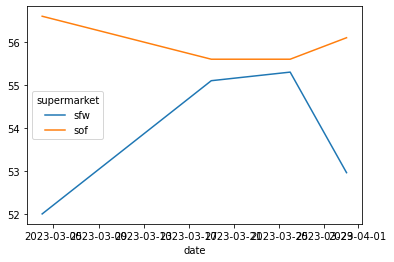

In [18]:
webscraping_results[webscraping_results['datetime'] > '2023-02-26'].groupby(['date', 'supermarket'])['product_price'].sum().unstack().plot(legend=True)